## Monopoly simulation 

based on http://koaning.io/monopoly-simulations.html

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class Player(object):
    def __init__(self, start_pos):
        """Return a Player object."""
        self.position = start_pos
        self.cash_spent = 0
        self.jail_turns_left = 0
        self.history = [start_pos]
        self.jail_tile = 10
        self.goto_jail_tile = 30

    def dice_roll(self, n = 1):
        d1, d2 = np.random.randint(1, 7, 2)
        if (d1 == d2) & (n <= 3): 
            return [d1 + d2] + self.dice_roll(n + 1)
        return [d1 + d2]

    def new_pos(self):
        if self.jail_turns_left > 0:
            d1, d2 = np.random.randint(1, 7, 2)
            if d1 != d2:
                self.jail_turns_left -= 1
                new_positions = [self.jail_tile]
            else: 
                self.jail_turns_left = 0
                new_positions = [(self.jail_tile + d1 + d2) % 40]
        else:
            rolled_eyes = self.dice_roll()
            deltas = list(np.cumsum([i for i in rolled_eyes]))
            new_positions = [(self.position + i) % 40 for i in deltas]

            if len(new_positions) == 4: 
                new_positions.pop() 
                new_positions[-1] = self.jail_tile
                self.jail_turns_left = 2

            if self.goto_jail_tile in new_positions:
                new_positions = new_positions[:new_positions.index(self.goto_jail_tile)]
                new_positions.append(self.jail_tile)
                self.jail_turns_left = 2

        self.history += new_positions
        self.position = self.history[-1]
        return self

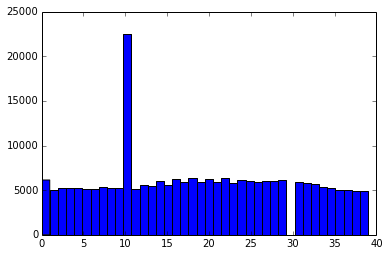

In [5]:
players = [Player(0) for i in range(1000)]
res = []
for player in players:
    for i in range(200):
        player = player.new_pos()
    res = res + player.history
_ = plt.hist(res, bins = 40)

In [4]:
deedInfo = """name,rent,house_1,house_2,house_3,house_4,hotel,deed_cost,house_cost,color,tile
Mediterranean Avenue,2,10,30,90,160,250,60,50,purple,1
Baltic Avenue,4,20,60,180,320,450,60,50,purple,3
Oriental Avenue,6,30,90,270,400,550,100,50,light_blue,6
Vermont Avenue,6,30,90,270,400,550,100,50,light_blue,8
Connecticut Avenue,8,40,100,300,450,600,120,50,light_blue,9
St. Charles Place,10,50,150,450,625,750,140,100,pink,11
States Avenue,10,50,150,450,625,750,140,100,pink,13
Virginia Avenue,12,60,180,500,700,900,160,100,pink,14
Tennessee Avenue,14,70,200,550,750,950,180,100,orange,16
St. James Place,14,70,200,550,750,950,180,100,orange,18
New York Avenue,16,80,220,600,800,1000,200,100,orange,19
Kentucky Avenue,18,90,250,700,875,1050,220,150,red,21
Indiana Avenue,18,90,250,700,875,1050,220,150,red,23
Illinois Avenue,20,100,300,750,925,1100,240,150,red,24
Atlantic Avenue,22,110,330,800,975,1150,260,150,yellow,26
Ventnor Avenue,22,110,330,800,975,1150,260,150,yellow,27
Marvin Gardens,24,120,360,850,1025,1200,280,150,yellow,29
Pacific Avenue,26,130,390,900,1100,1275,300,200,green,31
North Carolina Avenue,26,130,390,900,1100,1275,300,200,green,32
Pennsylvania Avenue,28,150,450,1000,1200,1400,320,200,green,34
Park Place,35,175,500,1100,1300,1500,350,200,blue,37
Boardwalk,50,200,600,1400,1700,2000,400,200,blue,39"""

In [7]:
temp = pd.read_csv('monopoly.csv')

In [8]:
temp

,name,rent,house_1,house_2,house_3,house_4,hotel,deed_cost,house_cost,color,tile
0,Mediterranean Avenue,2,10,30,90,160,250,60,50,purple,1
1,Baltic Avenue,4,20,60,180,320,450,60,50,purple,3
2,Oriental Avenue,6,30,90,270,400,550,100,50,light_blue,6
3,Vermont Avenue,6,30,90,270,400,550,100,50,light_blue,8
4,Connecticut Avenue,8,40,100,300,450,600,120,50,light_blue,9
5,St. Charles Place,10,50,150,450,625,750,140,100,pink,11
6,States Avenue,10,50,150,450,625,750,140,100,pink,13
7,Virginia Avenue,12,60,180,500,700,900,160,100,pink,14
8,Tennessee Avenue,14,70,200,550,750,950,180,100,orange,16
9,St. James Place,14,70,200,550,750,950,180,100,orange,18


In [12]:
temp['name']

0      Mediterranean Avenue
1             Baltic Avenue
2           Oriental Avenue
3            Vermont Avenue
4        Connecticut Avenue
5         St. Charles Place
6             States Avenue
7           Virginia Avenue
8          Tennessee Avenue
9           St. James Place
10          New York Avenue
11          Kentucky Avenue
12           Indiana Avenue
13          Illinois Avenue
14          Atlantic Avenue
15           Ventnor Avenue
16           Marvin Gardens
17           Pacific Avenue
18    North Carolina Avenue
19      Pennsylvania Avenue
20               Park Place
21                Boardwalk
Name: name, dtype: object